In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
ds = pd.read_csv(r"C:\Users\HP\Downloads\archive\IMDb Movies India.csv", encoding='latin1')

In [3]:
ds.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
ds.shape

(15509, 10)

In [5]:
ds.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [6]:
ds.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [7]:
ds.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [8]:
# Data Exploration and Preprocessing
# Select relevant columns
ds = ds[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Rating']]

# Drop rows with missing values
ds.dropna(inplace=True)

In [9]:
# Feature Engineering
column_transformer = ColumnTransformer([('encoder', OneHotEncoder(), ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'])], remainder='passthrough')
X_encoded = column_transformer.fit_transform(ds[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']])
y = ds['Rating']

In [10]:
# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [11]:
# Model Selection and Training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:

# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 6.615022342861483


In [13]:
# Visualization
# Feature importance
feature_names = column_transformer.named_transformers_['encoder'].get_feature_names_out()
coefficients = model.coef_
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance.sort_values(by='Coefficient', ascending=False, inplace=True)

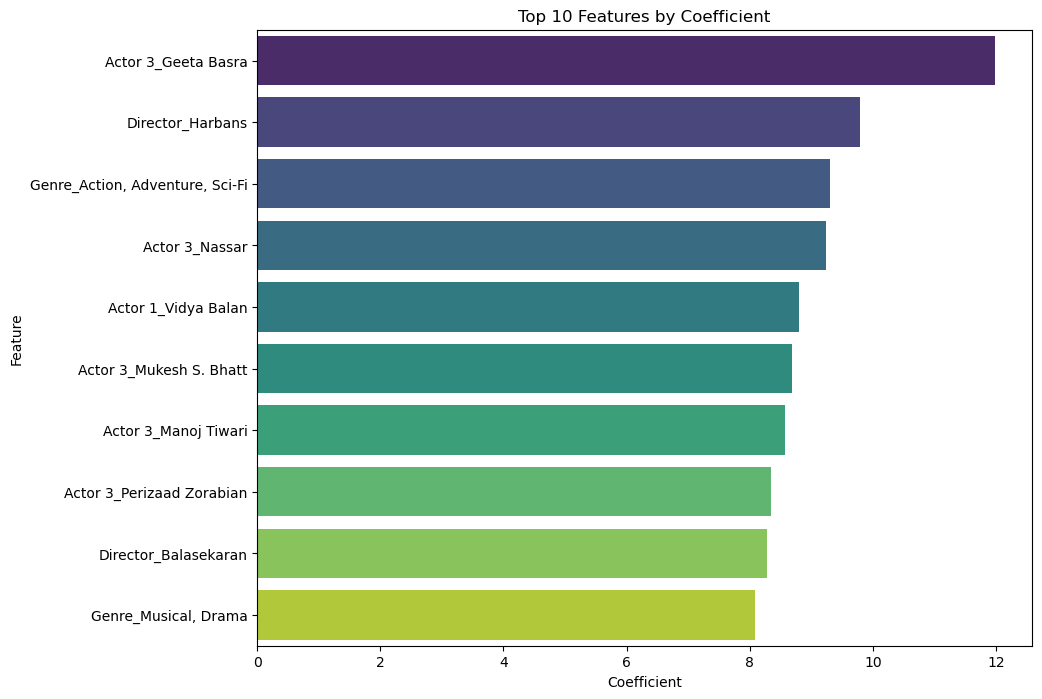

In [14]:
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance.head(10), x='Coefficient', y='Feature', palette='viridis')
plt.title('Top 10 Features by Coefficient')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

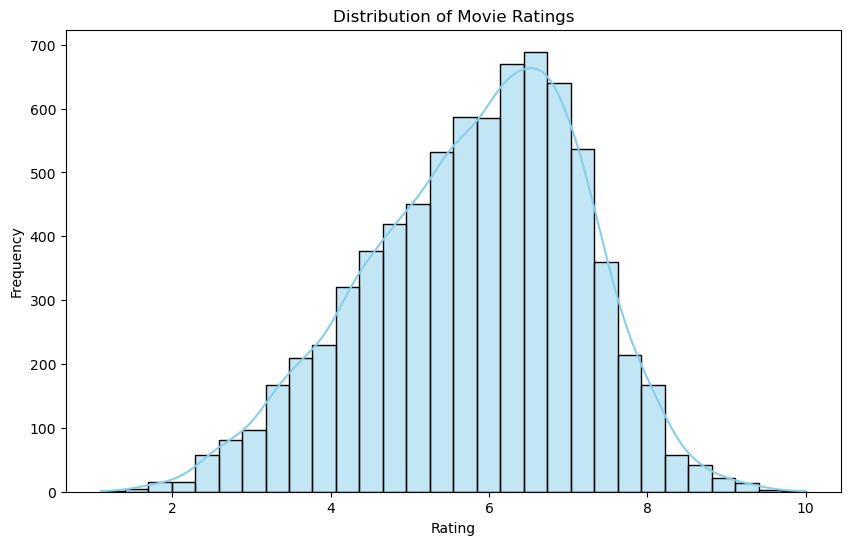

In [15]:
# Plotting distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(data=ds, x='Rating', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

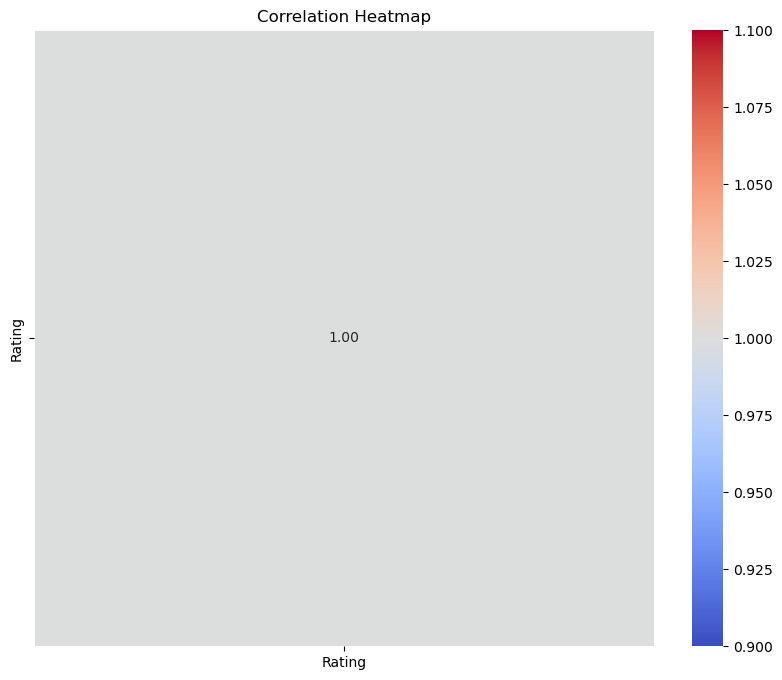

In [16]:
# Plotting correlation heatmap
plt.figure(figsize=(10, 8))
numeric_columns = ds.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(ds[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


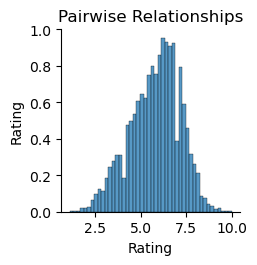

In [17]:
# Pairwise relationships using Seaborn pairplot
sns.pairplot(ds.select_dtypes(include=['float64', 'int64']))
plt.title('Pairwise Relationships')
plt.show()
